# Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years


# The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Means our output is Rings



In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

datafrm=pd.read_csv('abalone.data')



In [316]:
datafrm.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


------------------------


Here we can see Header is missing to we can add Header 


-------------------------

In [317]:
datafrm.columns=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

In [318]:
datafrm.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [319]:
datafrm.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [320]:
datafrm.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [321]:
datafrm.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [322]:
datafrm['Sex'].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

----------------

Lets check the  correlation First then we will check the Sex wise age. Relationship between length,weight,diameter,height wise age

--------------

In [323]:
corr=datafrm.corr()
corr

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


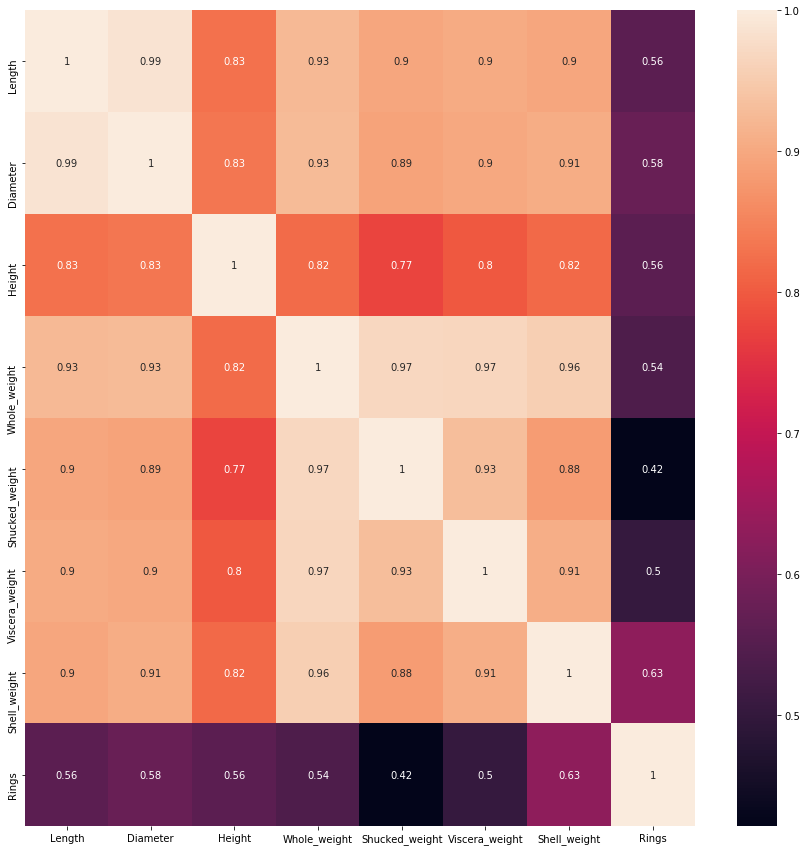

In [324]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

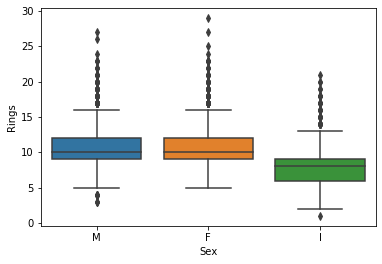

In [325]:
sns.boxplot(x='Sex',y='Rings',data=datafrm)

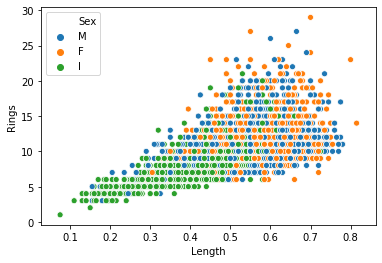

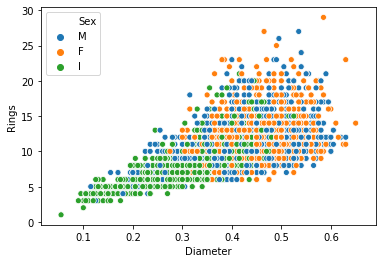

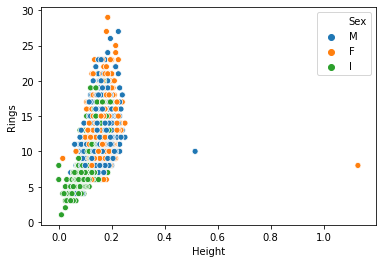

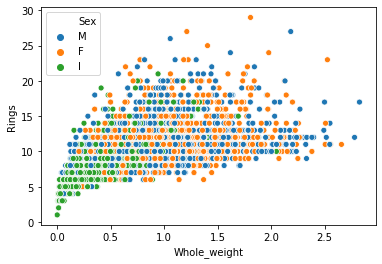

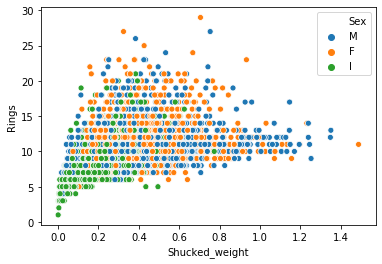

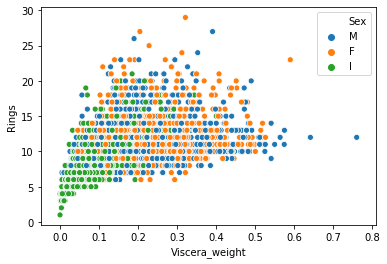

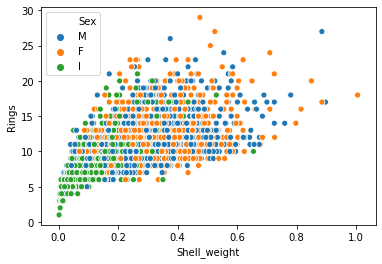

In [326]:
lst=['Rings','Sex']

for col in datafrm.columns:
    if col not in lst:
        sns.scatterplot(x=col,y='Rings',hue='Sex',data=datafrm)
        plt.show()

-----------------

Mostly  All the factors are directly Praportional to Rings.

Lets create x i.e Input and y i.e Output.




----------

In [327]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

le=LabelEncoder()
datafrm['Sex']=le.fit_transform(datafrm['Sex'])



In [328]:
x

,0,1,2,3,4,5,6,7
0,1.160035,-1.475376,-1.463082,-1.302154,-1.265707,-1.209465,-1.231211,-1.256096
1,-1.285149,0.077620,0.153174,-0.081713,-0.275942,-0.448795,-0.331295,-0.161774
2,1.160035,-0.698878,-0.420336,-0.352922,-0.628882,-0.647441,-0.597399,-0.591686
3,-0.062557,-1.647931,-1.567356,-1.573363,-1.310646,-1.257915,-1.318299,-1.373344
4,-0.062557,-0.828294,-1.098121,-1.166549,-0.989493,-1.008396,-0.950592,-0.865266
...,...,...,...,...,...,...,...,...
4021,-1.285149,0.379591,0.465998,0.731914,0.184413,0.101117,0.612166,0.143073
4022,1.160035,0.595285,0.361723,-0.081713,0.357595,0.435424,0.375091,0.232964
4023,1.160035,0.681562,0.726684,1.816750,0.817950,0.854520,1.081477,0.604251
4024,-1.285149,0.897256,0.830959,0.325101,0.639289,0.881168,0.825049,0.510452


Sex                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Length            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Diameter          AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Height            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Whole_weight         AxesSubplot(0.125,0.391471;0.168478x0.222059)
Shucked_weight    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Viscera_weight    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Shell_weight      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Rings                   AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

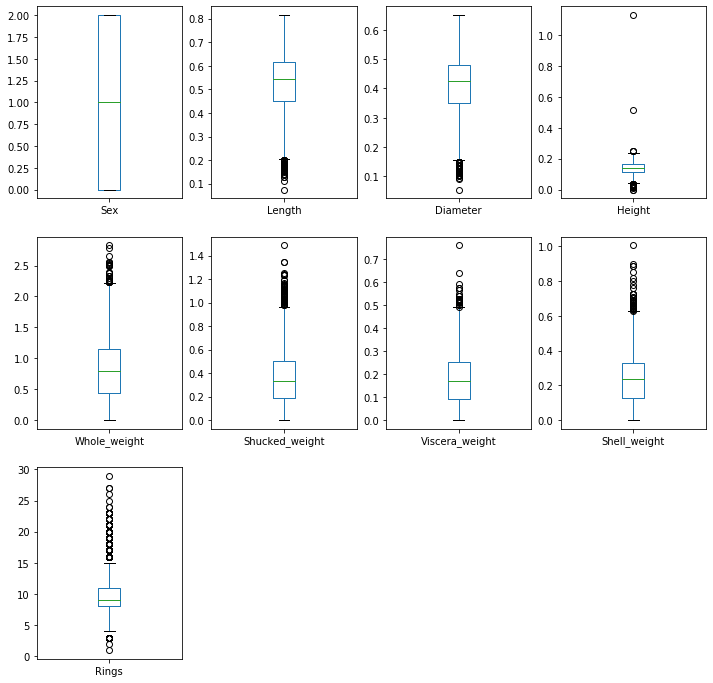

In [329]:

datafrm.plot(kind='box',subplots=True,layout=(3,4),figsize=[12,12])

In [330]:
from scipy.stats import zscore
z=np.abs(zscore(datafrm))
threshold=3

datafrm.shape

(4176, 9)

In [331]:
datafrm=datafrm[(z<3).all(axis=1)]


In [332]:
datafrm.shape

(4026, 9)

In [333]:
datafrm.skew()

Sex              -0.094445
Length           -0.623453
Diameter         -0.598910
Height           -0.244820
Whole_weight      0.333803
Shucked_weight    0.457905
Viscera_weight    0.436702
Shell_weight      0.349071
Rings             0.726115
dtype: float64

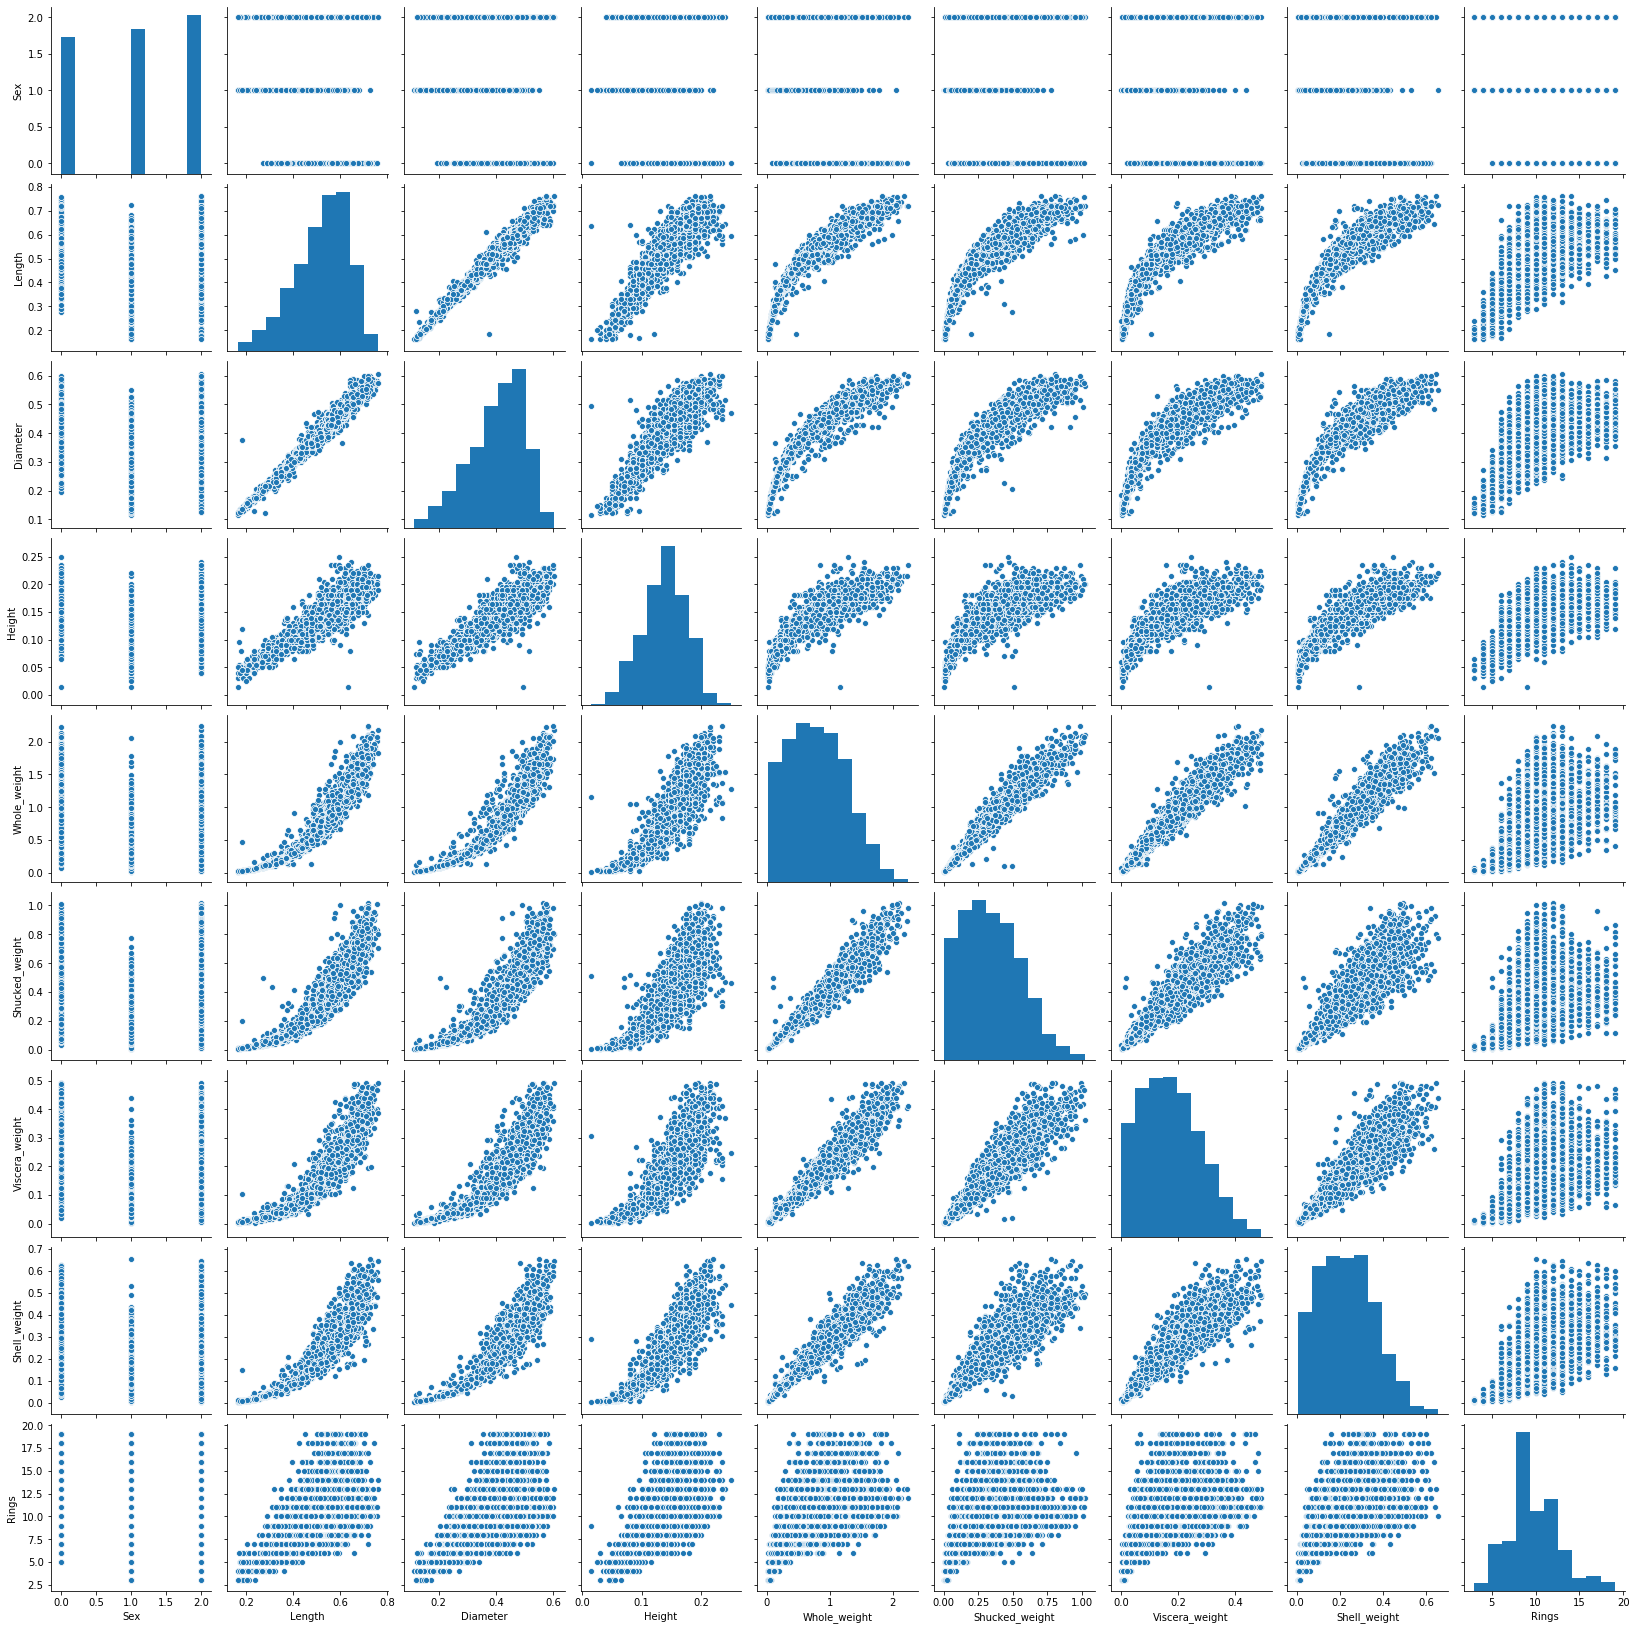

In [334]:
sns.pairplot(datafrm)
plt.show()

---------------------------

Our Output y is contineous so we will go with Linear Regression after removing outlies usinf Z score


----------------------------

In [335]:
x=datafrm.iloc[:,0:-1]
y=datafrm.iloc[:,-1]

-------------

Lets use StandardScaler for Normaliziing the data

--------------

In [336]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(data=x)

In [337]:
x

,0,1,2,3,4,5,6,7
0,1.160035,-1.475376,-1.463082,-1.302154,-1.265707,-1.209465,-1.231211,-1.256096
1,-1.285149,0.077620,0.153174,-0.081713,-0.275942,-0.448795,-0.331295,-0.161774
2,1.160035,-0.698878,-0.420336,-0.352922,-0.628882,-0.647441,-0.597399,-0.591686
3,-0.062557,-1.647931,-1.567356,-1.573363,-1.310646,-1.257915,-1.318299,-1.373344
4,-0.062557,-0.828294,-1.098121,-1.166549,-0.989493,-1.008396,-0.950592,-0.865266
...,...,...,...,...,...,...,...,...
4021,-1.285149,0.379591,0.465998,0.731914,0.184413,0.101117,0.612166,0.143073
4022,1.160035,0.595285,0.361723,-0.081713,0.357595,0.435424,0.375091,0.232964
4023,1.160035,0.681562,0.726684,1.816750,0.817950,0.854520,1.081477,0.604251
4024,-1.285149,0.897256,0.830959,0.325101,0.639289,0.881168,0.825049,0.510452


-------------------------------

Lets Apply Linear Regression Algorithm because our output is contineous.

If the Score of Linear algorithms is not up the point we will try Cross_val_score,Lasso,Ridge and ElasticNet techanique for same

---------------------

In [338]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso,Ridge

def trn_tst_split(input,output,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred_val=lm.predict(x_test)
    return r2_score(y_test,pred_val)
d={}

for i in range(0,100):
    scr = trn_tst_split(x,y,i)
    if scr > .50:
        d[i]=scr
        #print('Random_value is : ',i, 'Score is : ',scr)
random_st = max(d , key=d.get)

print('Random_value is : ',random_st, 'r2 Score is : ',d[random_st])



Random_value is :  95 r2 Score is :  0.573846222888646


In [340]:
from sklearn.preprocessing import PolynomialFeatures

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=random_st)


poly=PolynomialFeatures(8)
x_train=poly.fit_transform(x_train)
x_test=poly.fit_transform(x_test)

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=random_st)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred_val=lm.predict(x_test)
print('r2 Score of lm model : ', r2_score(y_test,pred_val))

r2 Score of lm model :  0.573846222888646


In [342]:
from sklearn.model_selection import cross_val_score

lmscore=cross_val_score(lm,x,y,scoring='r2',cv=15)
print(lmscore)
print(lmscore.mean(),lmscore.std())

print ('----------------------------')
print (lmscore.mean())


[0.5541119  0.44000317 0.33622355 0.32995495 0.31420822 0.04701106
 0.10114831 0.64996222 0.36142529 0.40236485 0.26795897 0.40984225
 0.49573075 0.43860199 0.47858663]
0.37514227481332374 0.15158416689457305
----------------------------
0.37514227481332374


In [343]:
print('------------Regularization---------')

lst=[0.00001,0.0001,0.001,0.01]
for i in lst:
    ls=Lasso(alpha=i)
    ls.fit(x_train,y_train)
    print('LASSO for alpha value :' , i ,'score is ', ls.score(x_train,y_train))
    
for i in lst:
    ls=Ridge(alpha=i)
    ls.fit(x_train,y_train)
    print('Ridge for alpha value :' , i ,'score is ', ls.score(x_train,y_train))

for i in lst:
    el=ElasticNet(alpha=i)
    el.fit(x_train,y_train)
    pred_val=el.predict(x_test)
    print('ElasticNet alpha is ',i,'score is ',el.score(x_train,y_train))

------------Regularization---------
LASSO for alpha value : 1e-05 score is  0.4988451012636813
LASSO for alpha value : 0.0001 score is  0.49884468068109855
LASSO for alpha value : 0.001 score is  0.4988026684344603
LASSO for alpha value : 0.01 score is  0.4958561655918996
Ridge for alpha value : 1e-05 score is  0.49884510551267214
Ridge for alpha value : 0.0001 score is  0.4988451055123686
Ridge for alpha value : 0.001 score is  0.4988451054820118
Ridge for alpha value : 0.01 score is  0.49884510244875035
ElasticNet alpha is  1e-05 score is  0.4988450915988192
ElasticNet alpha is  0.0001 score is  0.4988437309777286
ElasticNet alpha is  0.001 score is  0.498722881096329
ElasticNet alpha is  0.01 score is  0.49396123639749645


In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


model=[LinearSVR(),LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SGDRegressor()]

def trn_tst_split(model,inpt,outpt,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred_val=model.predict(x_test)
    return r2_score(y_test,pred_val)


best_rndm_state=[]
model_name=[]
r2score=[]
crossval_scr=[]
for algo in model_lst:
    d={}
    a=str(algo)  
    a=a.split('(')[0]
    for i in range(0,100):
        scr = trn_tst_split(algo,x,y,i)
        if scr > 0:
            d[i,a]=[scr*100]
        #        if scr > .82:
        #            print (a,'---------',i,'-------',scr)
    random_st = max(d , key=d.get)
    #print ('\nRandom_state with Model :',random_st,' Accurecy Score is :',(d[random_st]),'\n')
    best_rndm_state.append(random_st[0])
    model_name.append(random_st[1])
    r2score.append(d[random_st])
    cvs=cross_val_score(algo,x,y,scoring='r2',cv=15)
    #print('Scoreing Methode :', i,' Mean of Corss_val_Score :',max(lst)[0],' & Std. Deviation :',max(lst)[1])
    crossval_scr.append(cvs.mean()*100)
print ('\n')
print('---------------Details of all Regressor Algorithms---------------')
result=pd.DataFrame({'Model': model_name,'Best_Random_State':best_rndm_state,'r2_Score':r2score,'Cross_Val_Score':crossval_scr})
result








---------------Details of all Regressor Algorithms---------------


,Model,Best_Random_State,r2_Score,Cross_Val_Score
0,LogisticRegression,81,[45.27061419494246],38.986942
1,GaussianNB,96,[24.514451505457714],14.896972
2,SVC,91,[35.54768262731576],26.937858
3,DecisionTreeClassifier,45,[24.815947667579252],11.188523
4,KNeighborsClassifier,35,[31.50115055303925],23.580108


---------------------


# SCORE is very low. Something is Wrong woth my Code.

# Need to ask 


------------------------